<a href="https://colab.research.google.com/github/dhairya-2005/Predictive-Maintainence/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dhairya-2005/Predictive-Maintainence/main/Engine.csv?token=GHSAT0AAAAAACU2TICASHEOHIWU377KAUFEZV2HXUA")

In [ ]:
dataset.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


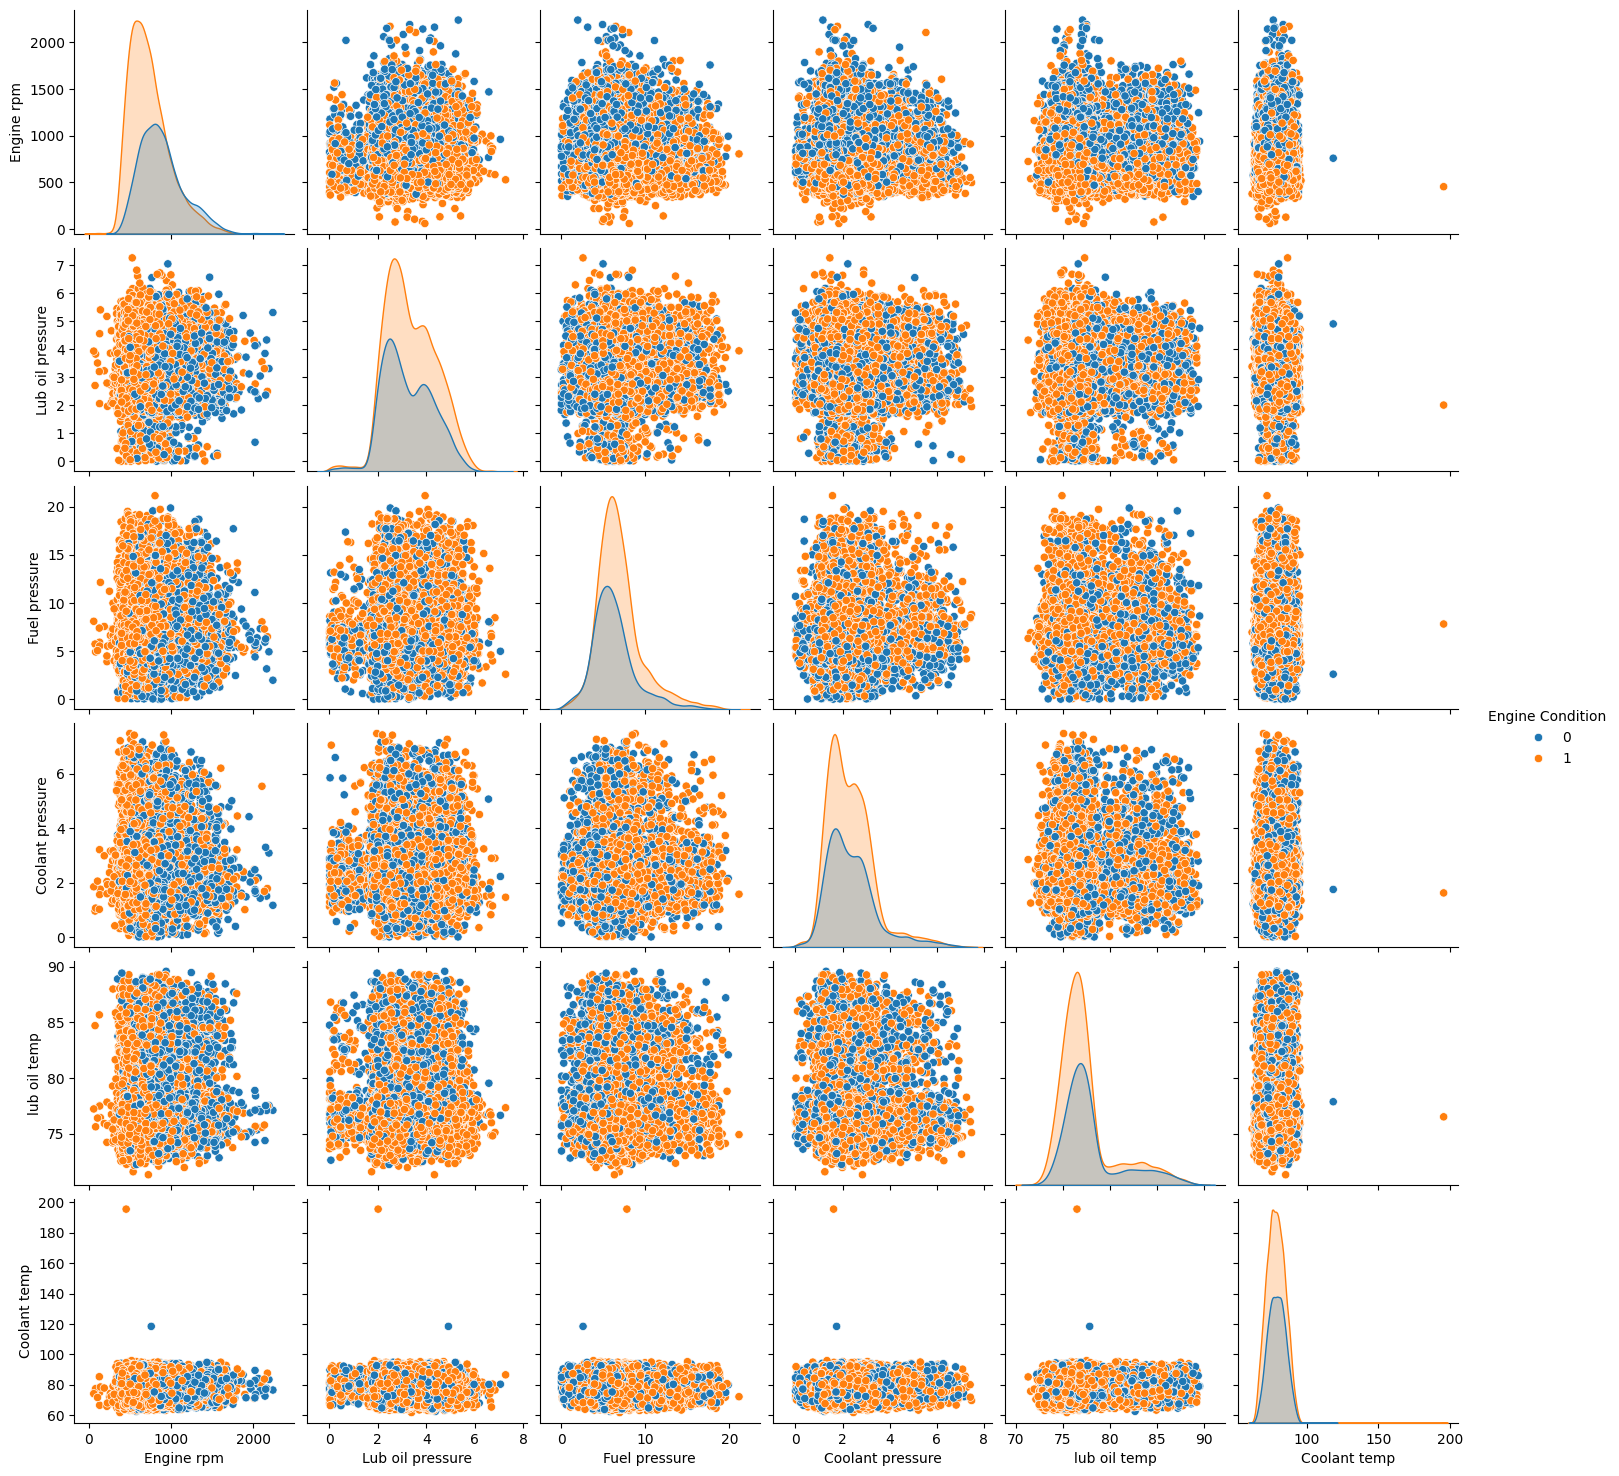

In [54]:
sb.pairplot(dataset, hue='Engine Condition')

In [ ]:
X = dataset.drop('Engine Condition', axis='columns')
y = dataset['Engine Condition']

In [27]:
sx = MinMaxScaler()
sy = MinMaxScaler()
X_scaled = sx.fit_transform(X)
X_scaled.shape

(19535, 6)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4)

In [48]:
ann = models.Sequential([
        layers.Input(shape=(6,)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='softmax')
    ])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6397 - loss: 0.6411 - val_accuracy: 0.6286 - val_loss: 0.6085
Epoch 2/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6306 - loss: 0.6161 - val_accuracy: 0.6286 - val_loss: 0.6032
Epoch 3/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6336 - loss: 0.6036 - val_accuracy: 0.6286 - val_loss: 0.6059
Epoch 4/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6333 - loss: 0.6059 - val_accuracy: 0.6286 - val_loss: 0.6061
Epoch 5/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6263 - loss: 0.6080 - val_accuracy: 0.6286 - val_loss: 0.6137
Epoch 6/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6340 - loss: 0.6049 - val_accuracy: 0.6286 - val_loss: 0.6026
Epoch 7/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6309 - loss: 0.6066 - val_accuracy: 0.6286 - val_loss: 0.6054
Epoch 8/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6250 - loss: 0.6065 - val_accuracy: 0

In [23]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

  1/184 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           0       0.37      1.00      0.54      2176
           1       0.00      0.00      0.00      3685

    accuracy                           0.37      5861
   macro avg       0.19      0.50      0.27      5861
weighted avg       0.14      0.37      0.20      5861



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
